In [39]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('dados_filtrados_v4.csv')

In [40]:
df = df.drop(columns=['Data de Nascimento', 'ID Aluno'])

In [41]:
corr = df.corr()
corr[corr > 0.3]

,Sexo,Cotista,Período de Ingresso na Unb,Período de saída da opção,Ano e Semestre,Média do período,Créditos cursados no total,Créditos cursados no semestre(com aprovação),Código da disciplina,Créditos disciplina,Menção na disciplina,Curso_Ciência da Computação,Curso_Computação,Curso_Engenharia Mecatrônica,Curso_Engenharia de Computação,Curso_Engenharia de Redes de Comunicação,Curso_Engenharia de Software,Curso_Informática,Forma de saída da opção_Ativo,Forma de saída da opção_Formatura,semestre,idade,saiu
Sexo,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cotista,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Período de Ingresso na Unb,NaN,NaN,1.000000,NaN,0.958453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.589859,NaN,NaN,NaN,NaN
Período de saída da opção,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550760,NaN,NaN,NaN
Ano e Semestre,NaN,NaN,0.958453,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.569452,NaN,NaN,NaN,NaN
Média do período,NaN,NaN,NaN,NaN,NaN,1.000000,0.423218,0.737063,NaN,NaN,0.618752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.377225,NaN,NaN,NaN
Créditos cursados no total,NaN,NaN,NaN,NaN,NaN,0.423218,1.000000,0.488923,NaN,NaN,0.307774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.742559,0.378100,NaN,NaN
Créditos cursados no semestre(com aprovação),NaN,NaN,NaN,NaN,NaN,0.737063,0.488923,1.000000,NaN,NaN,0.512668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394443,NaN,NaN,NaN
Código da disciplina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.319772,NaN,NaN,NaN,NaN,NaN,NaN
Créditos disciplina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
def get_age_range(age):
    if age <= 20: return 'ate 20'
    if age <= 25: return '21-25'
    if age <= 30: return '26-30'
    if age <= 35: return '31-35'
    return 'maior que 35'

In [43]:
df['intervalo_idade'] = df['idade'].apply(get_age_range)

In [88]:
import math
def percetage(x, pos):
    return "%.1f" % (x * 100) + "%"
formatter = FuncFormatter(percetage)
plt.rcParams['figure.figsize'] = (25, 7)

def display_reprovation_graph(dataFrame):
    
    semestres = dataFrame['semestre'].unique()
    semestres.sort()
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(formatter)
    
    b = np.zeros((len(semestres), 3))
    for i, semestre in enumerate(semestres):
        a = df[df["semestre"] == semestre]
        b[i] = np.array([a[a["Menção na disciplina"] >=3]["Menção na disciplina"].count() / a["Menção na disciplina"].count(),
                         semestre, int(a["Menção na disciplina"].count())])
    
    #plt.rcParams['figure.figsize'] = (math.ceil(0.5 * b[:,1].size), 7)
    plt.bar(b[:,1], b[:,0], width=.2)
    plt.xticks(b[:,1], [str(x) + ' s' for x in b[:,1]])
    plt.show()

ate 20


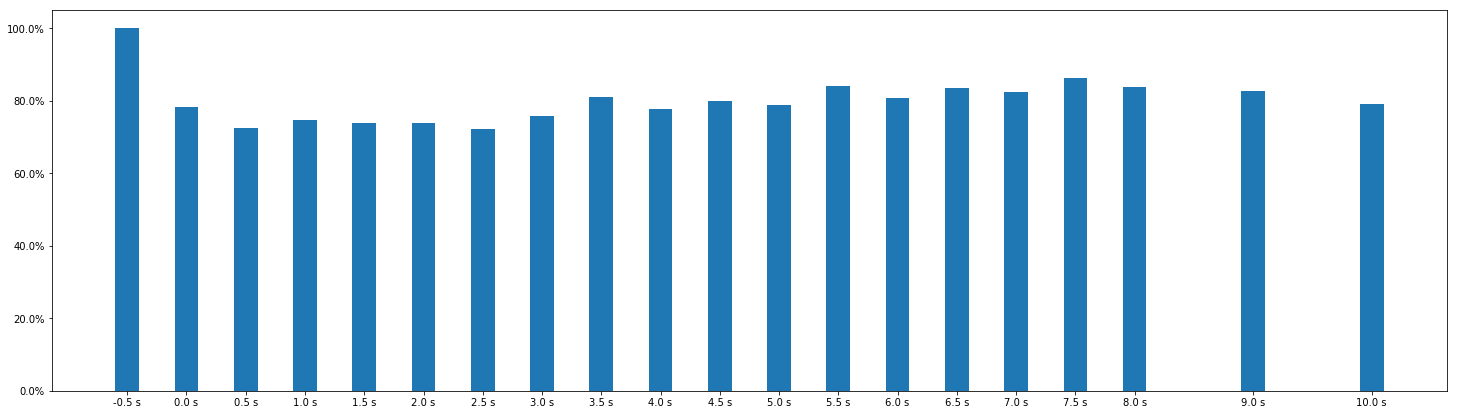

21-25


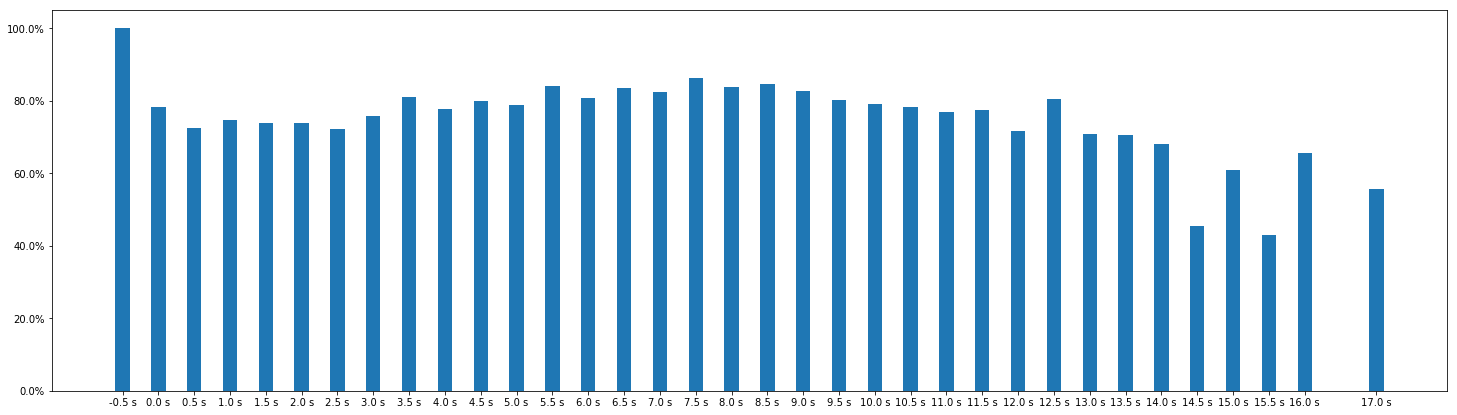

26-30


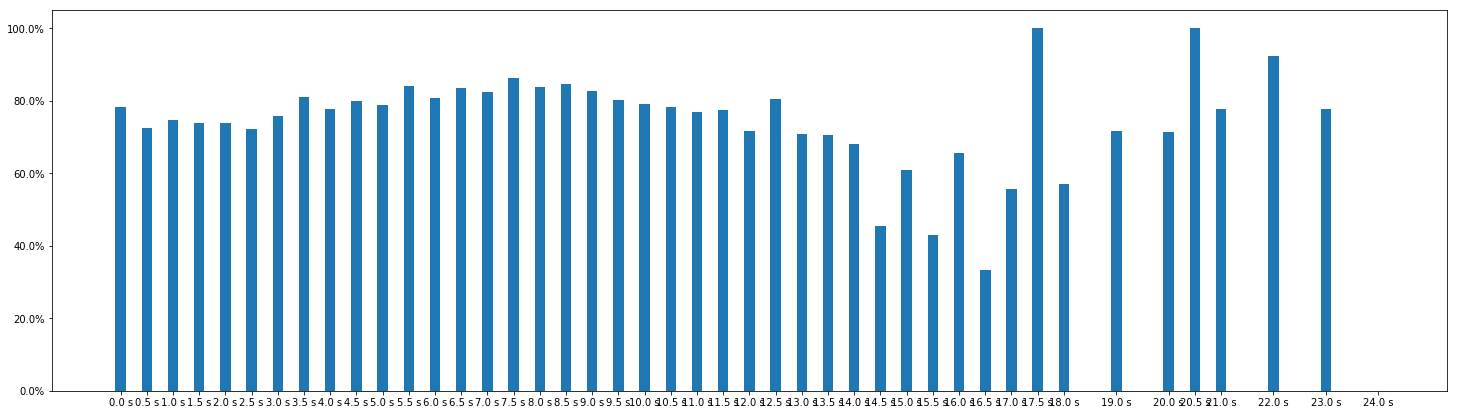

31-35


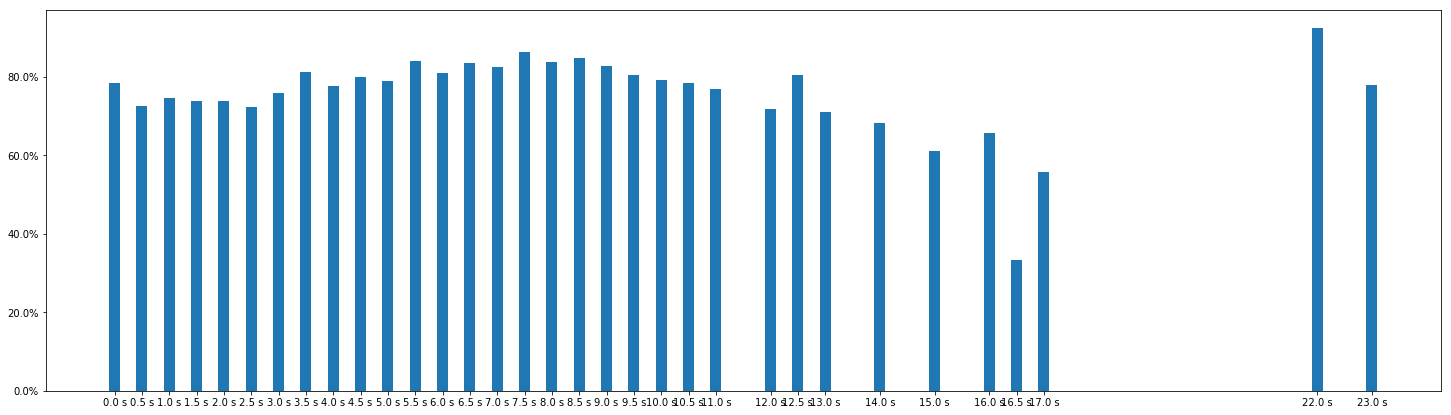

maior que 35


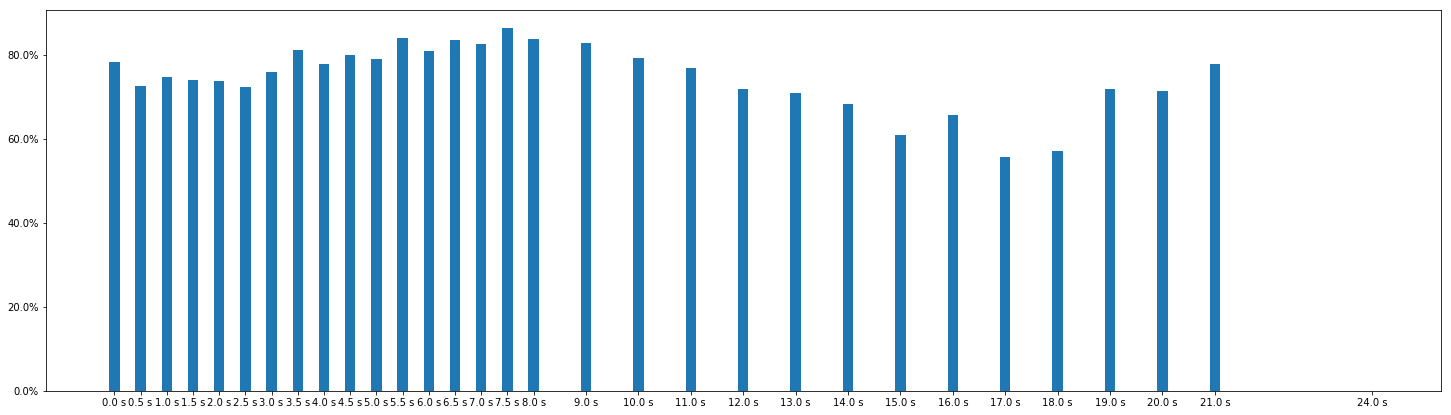

In [89]:
allIntervals = df['intervalo_idade'].unique()
for interval in allIntervals:
    print(interval)
    display_reprovation_graph(df[df['intervalo_idade'] == interval])

In [116]:
b = df.groupby('Código da disciplina').count()
a = b[b['Sexo'] >= 500]
a.count()

Sexo                                            147
Cotista                                         147
Período de Ingresso na Unb                      147
Período de saída da opção                       147
Ano e Semestre                                  147
Média do período                                147
Créditos cursados no total                      147
Créditos cursados no semestre(com aprovação)    147
Créditos disciplina                             147
Menção na disciplina                            147
Curso_Ciência da Computação                     147
Curso_Computação                                147
Curso_Engenharia Mecatrônica                    147
Curso_Engenharia de Computação                  147
Curso_Engenharia de Redes de Comunicação        147
Curso_Engenharia de Software                    147
Curso_Informática                               147
Forma de saída da opção_Ativo                   147
Forma de saída da opção_Formatura               147
semestre    